# CX 4230, Spring 2016: [20] Generating Random Variates and Testing Random Number Generators

## (Sample solutions)

This notebook accompanies the slides presented in class: [link](https://t-square.gatech.edu/access/content/group/gtc-59b8-dc03-5a67-a5f4-88b8e4d5b69a/cx4230-sp16--20-rand-var-test.pdf).

For a deeper survey of these ideas, see the readings from the last lab, especially volume 2 of Knuth's _The Art of Computer Programming_: [link](https://t-square.gatech.edu/access/content/group/gtc-59b8-dc03-5a67-a5f4-88b8e4d5b69a/Knuth-TAOCP-v2--9780133488791.pdf).

## From uniform to arbitrary distributions

Suppose you are given a way to generate a uniform random variable $U \sim \mathcal{U}(0, 1)$. How do you convert $U$ into a different random variable $X$ following some _other_ distribution, such as exponential?

One technique is to "invert" the _cumulative distribution function_ (CDF) of $X$. Recall that the CDF of $X$ is a function

$$
  F_X(x) \equiv \mathrm{Pr}[X \leq x].
$$

Given a sample value $u$ of the random variable $U$, you can convert $u$ into a sample $x$ of $X$ by

$$
  x = F_X^{-1}(u).
$$

**Example.** Let $X \sim \mathcal{E}(\lambda)$ be an exponentially distributed random variable with mean $\lambda$. Then it has a cumulative distribution

$$
  F_X(x) = 1 - e^{-x / \lambda}.
$$

Given an observed sample $u$ of a random variable $U$, you would compute the sample $x$ by solving $u = F_X^{-1}(x)$ for $x$. The result would be

$$
  x = {-\lambda \ln (1-u)}
$$  

**Exercise.** Implement a function to generate samples from $\mathcal{E}(\lambda)$.

In [1]:
from random import random, seed
from math import log

def sample_exp (l):
    """Generates a sample from an exponential random variable with mean `l`."""
    # @YOUSE
    u = random ()
    x = -l * log (1-u)
    return x

Sample mean: 4.83646939019628


(array([ 104.,   66.,   37.,   20.,    8.,    7.,    4.,    2.,    1.,    1.]),
 array([  5.30790571e-03,   2.77581781e+00,   5.54632771e+00,
          8.31683762e+00,   1.10873475e+01,   1.38578574e+01,
          1.66283673e+01,   1.93988772e+01,   2.21693871e+01,
          2.49398970e+01,   2.77104069e+01]),
 <a list of 10 Patch objects>)

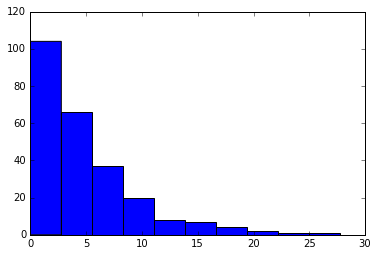

In [2]:
# Test code: Generate samples and plot them as a histogram
import matplotlib.pyplot as plt
%matplotlib inline

n = 250
l = 5.0
seed (20160224)
x = [sample_exp (l) for i in range (n)]

x_mean = sum (x) / n
print ("Sample mean:", x_mean)
plt.hist (x)

## Generating samples for an empirical CDF

You can apply essentially the same idea to discrete random variables. Let's walk through an example.

Suppose you wish to generate letters from a distribution that matches the empirically observed distribution of letters in the English language.

In [3]:
import requests # http://docs.python-requests.org/en/master/user/quickstart/#make-a-request

def download_text (url):
    print ("... downloading", url, "...")
    req = requests.get (url)
    return req.text

text = download_text ('http://www.gutenberg.org/cache/epub/11/pg11.txt')
#text = download_text ('http://www.gutenberg.org/cache/epub/15532/pg15532.txt')
print ("\n=== Snippet ===\n...", text[5000:5500], "\n...")

... downloading http://www.gutenberg.org/cache/epub/11/pg11.txt ...

=== Snippet ===
...  the cat.) 'I hope they'll remember her saucer of milk at
tea-time. Dinah my dear! I wish you were down here with me! There are no
mice in the air, I'm afraid, but you might catch a bat, and that's very
like a mouse, you know. But do cats eat bats, I wonder?' And here Alice
began to get rather sleepy, and went on saying to herself, in a dreamy
sort of way, 'Do cats eat bats? Do cats eat bats?' and sometimes, 'Do
bats eat cats?' for, you see, as she couldn't answer either question,
it didn 
...


**Exercise.** From what book was this text drawn?

> Answer: ??

Next, let's make a histogram of letter frequencies, stored as a dictionary where the key is the letter and the value is the number of occurrences of that letter. For simplicity, consider only alphabetic characters and normalize all characters to lowercase.

In [4]:
# Make a histogram of individual characters. See: https://docs.python.org/2/library/collections.html
from collections import Counter

def count_chars (s):
    """
    Given a string or list of characters `s`, this function returns a
    histogram of the number of occurrences of alphabetic characters.
    The histogram is stored as a dictionary and the characters are
    normalized to lowercase.
    """
    histogram = Counter ()
    for c in s:
        if c.isalpha ():
            histogram[c.lower ()] += 1
    return histogram

# Count the occurrences of each (lowercase) alphabetic characters
text_counts = count_chars (text)
num_chars = sum (text_counts.values ())
print ("=== Occurrences:", num_chars, "characters total ===")
text_counts

=== Occurrences: 122989 characters total ===


Counter({'a': 9802,
         'b': 1746,
         'c': 3000,
         'd': 5469,
         'e': 15395,
         'f': 2382,
         'g': 2943,
         'h': 7889,
         'i': 8633,
         'j': 235,
         'k': 1290,
         'l': 5211,
         'm': 2467,
         'n': 8051,
         'o': 9477,
         'p': 1968,
         'q': 220,
         'r': 6610,
         's': 7268,
         't': 12200,
         'u': 3978,
         'v': 963,
         'w': 2952,
         'x': 176,
         'y': 2584,
         'z': 80})

To make this distribution a little easier to read, let's convert it to a list and sort by value.

In [5]:
# A function to "sort" dictionaries:
# http://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value
import operator

def sort_dict (d, descending=False):
    """
    Given a dictionary `d`, returns a list of (key, value) pairs sorted by value.
    To sort in descending order, set `ascending=False`.
    """
    if descending:
        compare = lambda x: -(operator.itemgetter (1) (x))        
    else:
        compare = operator.itemgetter (1)
    return sorted (d.items (), key=compare)

text_counts_sorted = sort_dict (text_counts, descending=True)
text_counts_sorted

[('e', 15395),
 ('t', 12200),
 ('a', 9802),
 ('o', 9477),
 ('i', 8633),
 ('n', 8051),
 ('h', 7889),
 ('s', 7268),
 ('r', 6610),
 ('d', 5469),
 ('l', 5211),
 ('u', 3978),
 ('c', 3000),
 ('w', 2952),
 ('g', 2943),
 ('y', 2584),
 ('m', 2467),
 ('f', 2382),
 ('p', 1968),
 ('b', 1746),
 ('k', 1290),
 ('v', 963),
 ('j', 235),
 ('q', 220),
 ('x', 176),
 ('z', 80)]

Let's convert these ordered counts into a CDF.

In [6]:
def cumsum_key_value_pairs (p):
    s = 0.0
    p_cumulative = []
    for (k, v) in p:
        s = s + v
        p_cumulative.append ((k, s))
    return p_cumulative

text_cdf = [(k, float (v)/num_chars) for (k, v) in cumsum_key_value_pairs (text_counts_sorted)]
print ("=== Empirical CDF ===")
text_cdf

=== Empirical CDF ===


[('e', 0.12517379603053932),
 ('t', 0.22436965907520184),
 ('a', 0.3040678434656758),
 ('o', 0.3811235151111075),
 ('i', 0.45131678442787565),
 ('n', 0.5167779232289067),
 ('h', 0.5809218710616396),
 ('s', 0.6400165868492305),
 ('r', 0.6937612306791664),
 ('d', 0.7382286220718927),
 ('l', 0.7805982648854776),
 ('u', 0.8129426208847945),
 ('c', 0.837335046223646),
 ('w', 0.8613371927570759),
 ('g', 0.8852661620144892),
 ('y', 0.9062761710396865),
 ('m', 0.9263348754766686),
 ('f', 0.9457024611957167),
 ('p', 0.9617038922180032),
 ('b', 0.9759002837652148),
 ('k', 0.9863890266609209),
 ('v', 0.9942189951946923),
 ('j', 0.9961297351795689),
 ('q', 0.9979185130377514),
 ('x', 0.9993495353242973),
 ('z', 1.0)]

**Exercise.** Write a function to generate a sample from a discrete CDF like `text_cdf`. Recall that `text_cdf` is a list of (key, value) pairs where the key is an outcome of the random variable and the value is the cumulative probability of observing the key and all preceding keys in list order.

> Hint: The [`bisect()`](https://docs.python.org/2/library/bisect.html) makes this task easy. In particular, given a list `X` of values in ascending order, `bisect(X, v)` returns the largest index `i` such `X[i] <= v`.

In [7]:
from bisect import bisect # Per the hint

def gen_sample (cdf):
    """
    Given a discrete cumulative distribution function, this function returns
    a single random sample from the distribution. The input CDF is given as
    a list `cdf` of (`key`, `value`) pairs, where `value` is the cumulative
    probability of observing the key and all preceding keys in the list.
    """
    # @YOUSE
    #return ...
    u = random ()
    i = bisect ([v for (_, v) in cdf], u)
    return cdf[i][0]

In [8]:
# Test code: Generate `n` samples and count the occurrences of each unique character.
n = 1000
sample = [gen_sample (text_cdf) for i in range (n)]
sort_dict (count_chars (sample), descending=True)

[('e', 135),
 ('t', 110),
 ('h', 77),
 ('o', 74),
 ('s', 71),
 ('a', 69),
 ('i', 65),
 ('n', 61),
 ('l', 44),
 ('r', 44),
 ('d', 34),
 ('u', 27),
 ('c', 25),
 ('f', 23),
 ('g', 20),
 ('y', 20),
 ('w', 19),
 ('m', 18),
 ('p', 16),
 ('k', 15),
 ('b', 14),
 ('v', 11),
 ('j', 3),
 ('q', 2),
 ('x', 2),
 ('z', 1)]

## Chi-square ($\chi^2$) testing

**Overview.** The previous example began with a "true" (empirical) distribution of letter frequencies, extracted from text real text. We then generated samples from this distribution.

What if we had just been handed the generated samples. How could we check whether they came from our letter-frequency distribution? 

In class, we discussed one way to test how likely a random sample was to have been drawn from a given discrete distribution, using a method called the _chi-square ($\chi^2$) test_. There are canned (black-box) routines to compute it, e.g., [`scipy.stats.chisquare()`](http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.chisquare.html). Here is how we would apply it to the data for the pair of dice in the slides.

In [9]:
# Check against slide data
X_slides = [4, 8, 12, 16, 20, 24, 20, 16, 12, 8, 4]
Y_slides = [2, 4, 10, 12, 22, 29, 21, 15, 14, 9, 6]
chisquare (Y_slides, f_exp=X_slides)

NameError: name 'chisquare' is not defined

However, for pedagogical purposes, let's see how it works the black-box actually works through a series of exercises. In these exercises, assume that the `sample` dictionary computed above is the set of values we are testing against a "true" distribution, which comes from the text (`text_counts`).

**Walk-through.** Per the class slides, consider a discrete distribution for which you know that any outcome $v$ occurs with probability $p_v$. You observe a random sample of size $n$, $\{y_0, y_1, \ldots, y_{n-1}\}$. You wish to check how likely it is to have come from the given distribution.

**Exercise.** Convert the letter counts into probabilities.

In [ ]:
# @YOUSE: Compute a new dictionary of key-value pairs, (v, p_v), from `text_counts`.
#text_probs = ...
text_probs = {k: (float (v)/num_chars) for (k, v) in text_counts.items ()}
text_probs

Next, compute the _counts_ of the number of occurrences of $v$ in the sample. Denote these observed counts mathematically by $Y_v$.

**Exercise.** Compute a dictionary `sample_counts[k] = c` where `k` is $v$ and `c` is $Y_v$.

In [ ]:
# @YOUSE:
#sample_counts = ...
sample_counts = count_chars (sample)

# Display
sample_counts

Next, compute the _chi-square statistic_, which is

$$
  \chi^2 \equiv \sum_v \dfrac{(Y_v - np_v)^2}{np_v},
$$

where $np_v$ is the expected number of occurrences of $v$ in a sample of size $n$.

**Exercise.** Complete the following function, which computes the $\chi^2$ statistic.

In [ ]:
def calc_chisquare_statistic (counts, probs):
    """
    Given a target distribution and empirically observed counts, compute the
    chi-square statistic of the observations relative to the target.
    
    The input `counts[v] = y_v` is the dictionary of observations and
    `probs[v] = p_v` is the probability of observing `v`.
    """
    n = sum (counts.values ())
    chi_sq = 0.0
    # @YOUSE:
    #assert False
    for (v, y_v) in counts.items ():
        x_v = float (n) * probs[v]
        chi_sq += (y_v - x_v)**2 / x_v
        if y_v < 5: print ("*** Warning: Only", y_v, "< 5 samples of item", v, "***")
    return chi_sq

In [ ]:
sample_chi2 = calc_chisquare_statistic (sample_counts, text_probs)
print ("\nchi^2 for the random sample:", sample_chi2)

To check the $\chi^2$ statistic, you also need to know the number of degrees of freedom of the distribution.

**Exercise.** Compute the degrees of freedom of the target distribution.

In [ ]:
# @YOUSE
#text_dof = ...
text_dof = len (text_probs) - 1

print ("Degrees of freedom =", text_dof)

At this point, you would "look up" the chances of observing your $\chi^2$ given the number of degrees of freedom. In Python, you can do this look-up by calling a function that evaluates the CDF of a $\chi^2$ distribution. See: http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.chi2.html

In [ ]:
from scipy.stats import chi2

chi2_stat_check = chi2.cdf (sample_chi2, text_dof)
chi2_stat_check2 = 1 - chi2_stat_check
print ("chi^2 CDF:", chi2_stat_check, "/", chi2_stat_check2)

**Exercise.** What would you conclude about the likelihood that the random sample came from the target distribution?

> Answer: ??

**Sanity check.** Let's double-check your result against what the "canned" routine produces.

In [ ]:
from scipy.stats import chisquare

def calc_chisquare (sample, probs):
    assert (type (sample) is dict) or (type (sample) is Counter) # Counts
    assert type (probs) is dict # Probabilities
    
    # Total number of samples
    n_Y = sum (sample.values ())

    Y = [] # Holds observed counts, $Y_v$ 
    X = [] # Holds expected counts, $X_v$

    for (v, p_v) in probs.items (): # probabilities of the true distribution
        x_v = p_v * n_Y
        if v in sample:
            y_v = sample[v]
        else:
            y_v = 0
        X.append (x_v)
        Y.append (y_v)
    
    return (chisquare (Y, f_exp=X), X, Y)

chi2_result, _, _ = calc_chisquare (sample_counts, text_probs)
print (chi2_result)

## Extra stuff: English vs. Spanish

How does the frequency distribution of English differ from Spanish? Let's download an example of Spanish text, compute the letter frequencies, and compare that distribution against the one for the English text.

> Spanish contains a number of vowels that don't occur in English. To make this comparable, the [`unidecode` package](https://pypi.python.org/pypi/Unidecode) can normalize a general unicode string into its closest pure ASCII representation. However, since `unidecode` is not a part of most standard Python distributions, you might need to install it first (see below).

In [ ]:
# Downloads and installs the unidecode module; see: https://pypi.python.org/pypi/Unidecode
!pip install unidecode

from unidecode import unidecode

In [ ]:
text_es = download_text ('http://www.gutenberg.org/cache/epub/15532/pg15532.txt')
# If you don't have unidecode, just comment this next line out:
text_es = unidecode (text_es)
print ("\n=== Snippet (Spanish text) ===\n...", text_es[5000:5500], "\n...")

In [ ]:
text_es_counts = count_chars (text_es)
sort_dict (text_es_counts, descending=True)

In [ ]:
num_chars_es = sum (text_es_counts.values ())
text_es_probs = {k: v/num_chars_es for (k, v) in text_es_counts.items ()}
text_es_probs

In [ ]:
text_probs_sorted = sort_dict (text_probs, descending=True)
x_labels = [k for (k, _) in text_probs_sorted]
y_values = [v for (_, v) in text_probs_sorted]

y_values_es = []
for v in x_labels:
    if v in text_es_probs:
        y_v = text_es_probs[v]
    else:
        y_v = 0.0
    y_values_es.append (y_v)

x_values = range (len (x_labels))
w = 0.25
fig = plt.figure (figsize=(16, 6))
ax = fig.add_subplot (111)
ax.bar ([x-w for x in x_values], y_values, w, color='b')
ax.bar (x_values, y_values_es, w, color='r')
ax.set_xticks (x_values)
ax.set_xticklabels (x_labels)
pass

In [ ]:
calc_chisquare (text_es_counts, text_probs)